In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

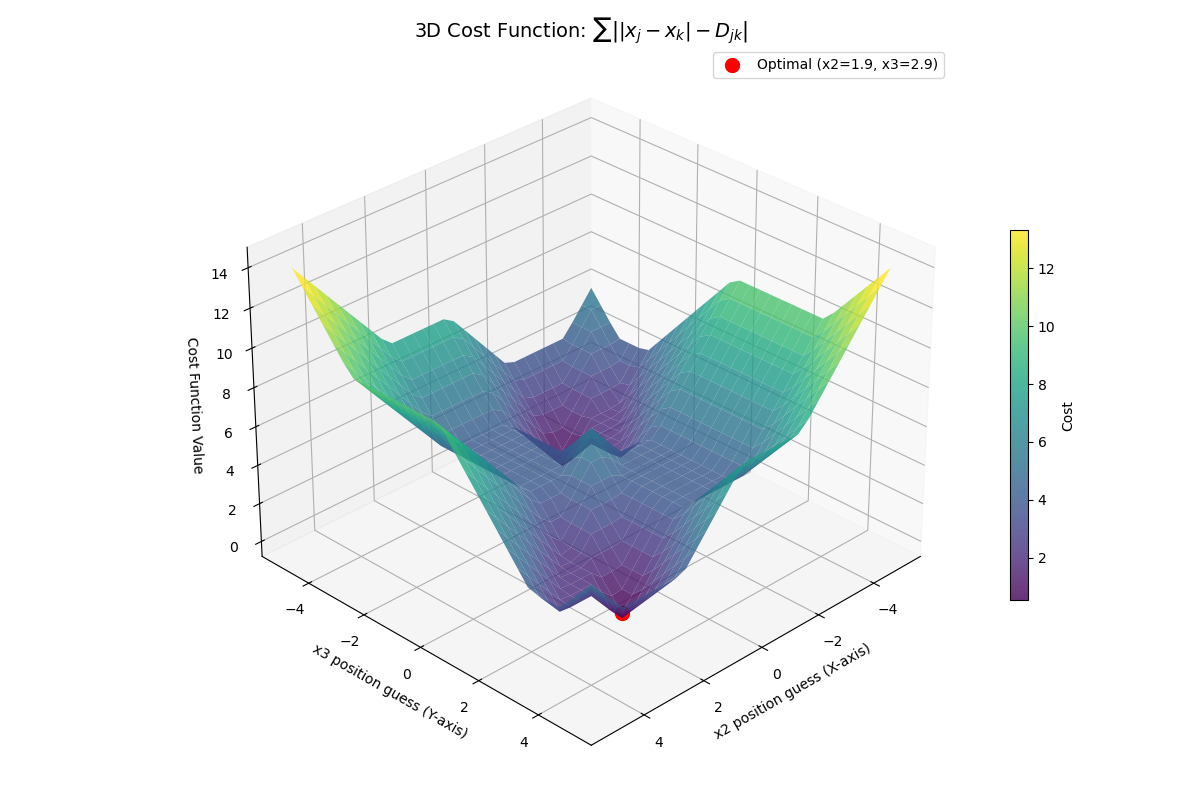

Optimal guesses: x2 = 1.90, x3 = 2.93
Minimum cost: 0.21


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 2, 3],  # D_11, D_12, D_13
    [2, 0, 1],  # D_21, D_22, D_23
    [3, 1, 0]   # D_31, D_32, D_33
])

# Fix x1 at (0, 0) for reference
x1 = np.array([0, 0])

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(-5, 5, 30)  # x2 guesses (X-axis)
y_guess = np.linspace(-5, 5, 30)  # x3 guesses (Y-axis)
X, Y = np.meshgrid(x_guess, y_guess)

# Compute cost for each (x2, x3) combination
cost = np.zeros_like(X)
for i in range(len(x_guess)):
    for j in range(len(y_guess)):
       # Vectorized distance calculations (faster)
        x2 = np.column_stack([X.ravel(), np.zeros_like(X.ravel())])
        x3 = np.column_stack([Y.ravel(), np.zeros_like(Y.ravel())])
        d12 = np.linalg.norm(x1 - x2, axis=1).reshape(X.shape)
        d13 = np.linalg.norm(x1 - x3, axis=1).reshape(X.shape)
        d23 = np.linalg.norm(x2 - x3, axis=1).reshape(X.shape)
        cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Find the minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the cost function
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark the optimal (x2, x3) guess
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x2 position guess (X-axis)')
ax.set_ylabel('x3 position guess (Y-axis)')
ax.set_zlabel('Cost Function Value')
ax.set_title(r'3D Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Rotate the view for better visibility
ax.view_init(elev=30, azim=45)  # Adjust angles as needed

plt.tight_layout()
plt.show()

print(f"Optimal guesses: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

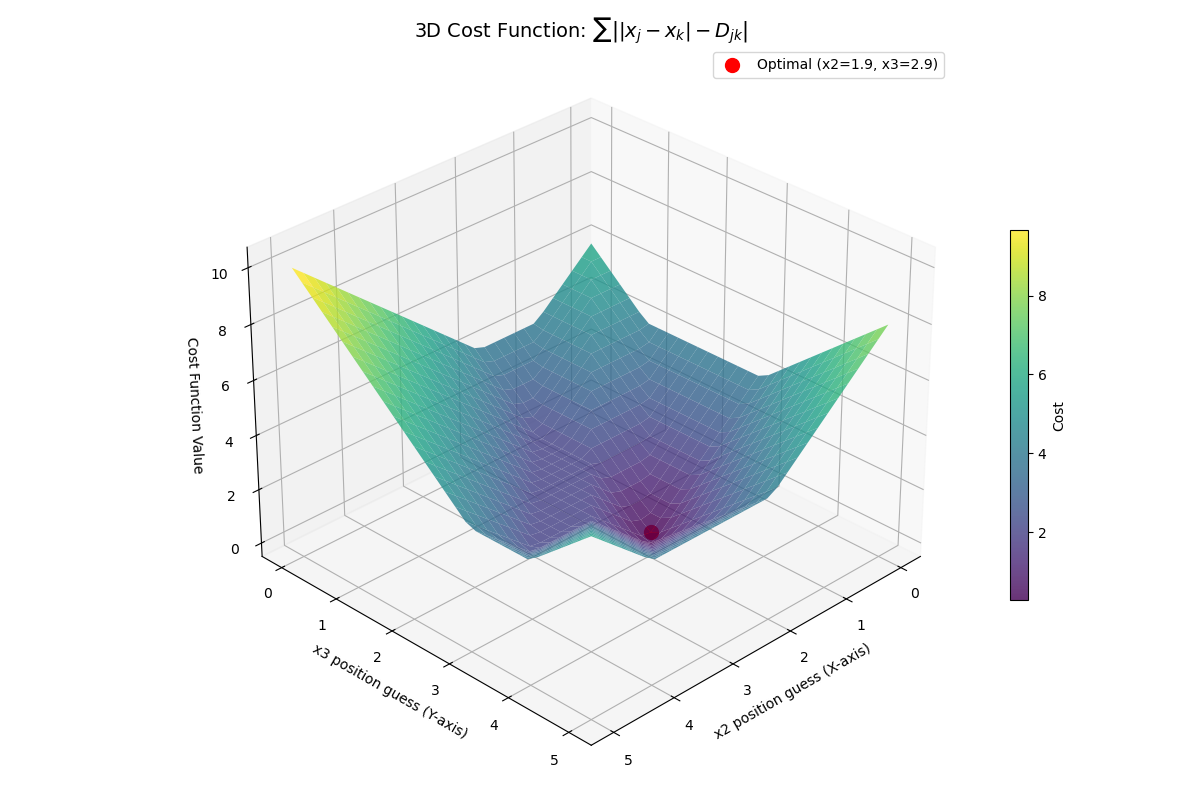

Optimal guesses: x2 = 1.90, x3 = 2.93
Minimum cost: 0.21


In [17]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 2, 3],  # D_11, D_12, D_13
    [2, 0, 1],  # D_21, D_22, D_23
    [3, 1, 0]   # D_31, D_32, D_33
])

# Fix x1 at (0, 0) for reference
x1 = np.array([0, 0])

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 5, 30)  # x2 guesses (X-axis)
y_guess = np.linspace(0, 5, 30)  # x3 guesses (Y-axis)
X, Y = np.meshgrid(x_guess, y_guess)

# Compute cost for each (x2, x3) combination
cost = np.zeros_like(X)
for i in range(len(x_guess)):
    for j in range(len(y_guess)):
       # Vectorized distance calculations (faster)
        x2 = np.column_stack([X.ravel(), np.zeros_like(X.ravel())])
        x3 = np.column_stack([Y.ravel(), np.zeros_like(Y.ravel())])
        d12 = np.linalg.norm(x1 - x2, axis=1).reshape(X.shape)
        d13 = np.linalg.norm(x1 - x3, axis=1).reshape(X.shape)
        d23 = np.linalg.norm(x2 - x3, axis=1).reshape(X.shape)
        cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Find the minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the cost function
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark the optimal (x2, x3) guess
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x2 position guess (X-axis)')
ax.set_ylabel('x3 position guess (Y-axis)')
ax.set_zlabel('Cost Function Value')
ax.set_title(r'3D Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Rotate the view for better visibility
ax.view_init(elev=30, azim=45)  # Adjust angles as needed

plt.tight_layout()
plt.show()

print(f"Optimal guesses: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

In [8]:
import numpy as np

def original_function(x2, x3, D):
    x1 = 0
    term12 = np.abs(np.abs(x1 - x2) - D[0, 1])
    term13 = np.abs(np.abs(x1 - x3) - D[0, 2])
    term23 = np.abs(np.abs(x2 - x3) - D[1, 2])
    return term12 + term13 + term23

# Example distance matrix
D = np.array([
    [0, 2, 3],
    [2, 0, 1],
    [3, 1, 0]
])

def hessian(f, x2, x3, D, epsilon=1e-5):
    # Gradient components (first derivatives)
    f_x2 = (f(x2 + epsilon, x3, D) - f(x2 - epsilon, x3, D)) / (2 * epsilon)
    f_x3 = (f(x2, x3 + epsilon, D) - f(x2, x3 - epsilon, D)) / (2 * epsilon)
    
    # Second derivatives
    f_x2x2 = (f(x2 + epsilon, x3, D) - 2 * f(x2, x3, D) + f(x2 - epsilon, x3, D)) / (epsilon ** 2)
    f_x3x3 = (f(x2, x3 + epsilon, D) - 2 * f(x2, x3, D) + f(x2, x3 - epsilon, D)) / (epsilon ** 2)
    f_x2x3 = (f(x2 + epsilon, x3 + epsilon, D) - f(x2 + epsilon, x3 - epsilon, D) 
             - f(x2 - epsilon, x3 + epsilon, D) + f(x2 - epsilon, x3 - epsilon, D)) / (4 * epsilon ** 2)
    
    return np.array([[f_x2x2, f_x2x3], [f_x2x3, f_x3x3]])

def hessian_determinant(x2, x3, D):
    H = hessian(original_function, x2, x3, D)
    return np.linalg.det(H)



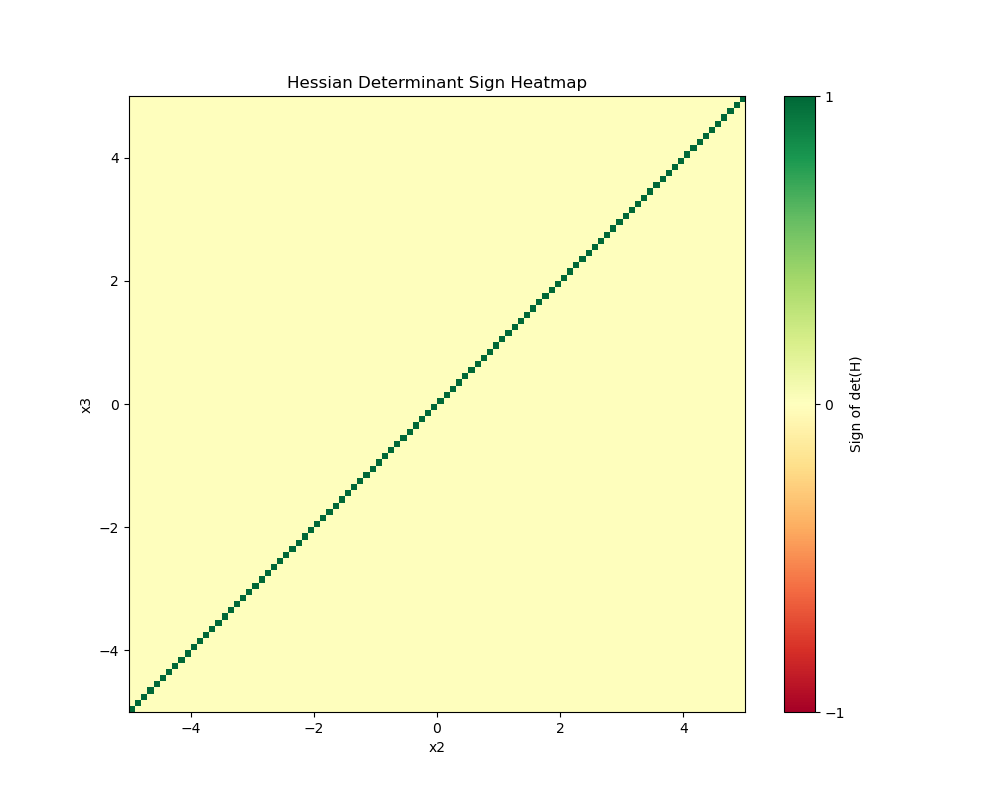

In [10]:
# Compute sign matrix
sign_matrix = np.zeros_like(X)
for i in range(len(x2_vals)):
    for j in range(len(x3_vals)):
        det = hessian_determinant(X[i,j], Y[i,j], D)
        if det > 1e-6:
            sign_matrix[i,j] = 1  # Positive
        elif det < -1e-6:
            sign_matrix[i,j] = -1  # Negative
        else:
            sign_matrix[i,j] = 0  # Zero

# Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(sign_matrix, cmap='RdYlGn', vmin=-1, vmax=1, 
           extent=[-5, 5, -5, 5], origin='lower')
plt.colorbar(label='Sign of det(H)', ticks=[-1, 0, 1])
plt.xlabel('x2')
plt.ylabel('x3')
plt.title('Hessian Determinant Sign Heatmap')
plt.grid(False)
plt.show()

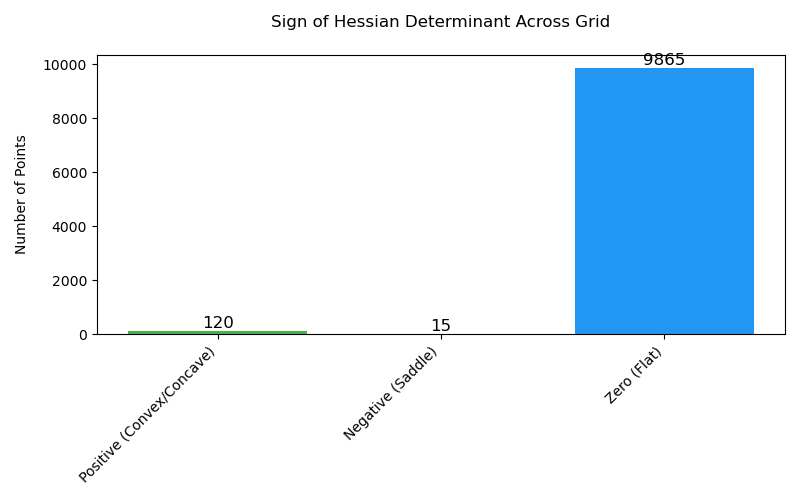

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate grid
x2_vals = np.linspace(0, 5, 100)
x3_vals = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x2_vals, x3_vals)

# Compute Hessian determinant signs
positive = negative = zero = 0

for i in range(len(x2_vals)):
    for j in range(len(x3_vals)):
        det = hessian_determinant(X[i,j], Y[i,j], D)
        if det > 1e-6:    positive += 1
        elif det < -1e-6: negative += 1
        else:             zero += 1

# Bar plot with counts
labels = ['Positive (Convex/Concave)', 'Negative (Saddle)', 'Zero (Flat)']
counts = [positive, negative, zero]
colors = ['#4CAF50', '#F44336', '#2196F3']  # Green, Red, Blue

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.title('Sign of Hessian Determinant Across Grid', pad=20)
plt.ylabel('Number of Points', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

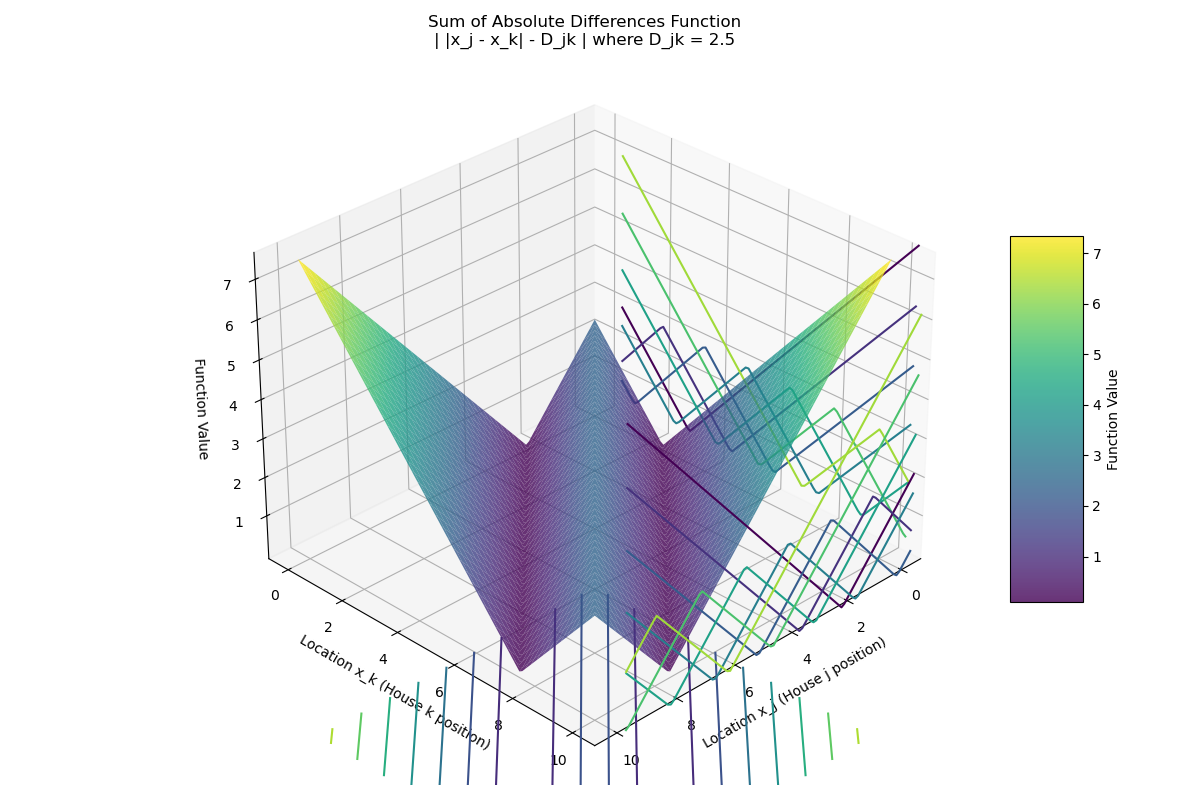

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_z(x_values, y_values, D):
    """
    Calculate the z-value for the function: sum(abs(abs(x_j - x_k) - D_jk))
    For this visualization, we'll assume D_jk is constant for simplicity
    """
    z = np.zeros_like(x_values)
    for i in range(len(x_values)):
        for j in range(len(y_values)):
            z[i, j] = np.sum(np.abs(np.abs(x_values[i, j] - y_values[i, j]) - D))
    return z

# Set up the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create coordinate grid
x = np.linspace(0, 10, 100)  # Possible x_j locations (0 to 10 units)
y = np.linspace(0, 10, 100)  # Possible x_k locations (0 to 10 units)
x_values, y_values = np.meshgrid(x, y)

# Assume a constant distance D_jk for visualization
D = 2.5  # You can change this to see how it affects the surface

# Calculate z values
z_values = calculate_z(x_values, y_values, D)

# Plot the surface
surface = ax.plot_surface(x_values, y_values, z_values, 
                         cmap='viridis', edgecolor='none', alpha=0.8)

# Add contour projections
ax.contour(x_values, y_values, z_values, zdir='z', offset=np.min(z_values)-5, cmap='viridis')
ax.contour(x_values, y_values, z_values, zdir='x', offset=np.min(x_values)-1, cmap='viridis')
ax.contour(x_values, y_values, z_values, zdir='y', offset=np.max(y_values)+1, cmap='viridis')

# Add labels and title
ax.set_xlabel('Location x_j (House j position)')
ax.set_ylabel('Location x_k (House k position)')
ax.set_zlabel('Function Value')
ax.set_title(f'Sum of Absolute Differences Function\n| |x_j - x_k| - D_jk | where D_jk = {D}')

# Add color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Function Value')

# Adjust viewing angle for better perspective
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()